In [ ]:
!pip install shifterator
!pip install emoji

In [96]:
import shifterator as sh
from collections import Counter
import pandas as pd
from itertools import chain
import emoji
import re

In [97]:
def preprocess(text):
    '''Removes hashtags and converts links to [URL] and usernames starting with @ to [USER],
    it also converts emojis to their textual form.'''
    documents = []
    for instance in text:
        instance = re.sub(r'@([^ ]*)', '[USER]', instance)
        instance = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '[URL]', instance)
        instance = emoji.demojize(instance)
        instance = instance.replace('#', '')
        documents.append(instance)
    return documents

In [98]:
d1 = []
data1 = pd.read_csv('train_all_tasks.csv')
data1['text'] = preprocess(data1['text'])
for n1 in data1['text']:
  n1 = n1.split()
  d1.append(n1)

d1_words = [val for sublist in d1 for val in sublist]
d1_wordfreq = Counter(d1_words)

In [99]:
d2 = []
data2 = pd.read_csv('EXIST2021_merged.csv')
data2['text'] = preprocess(data2['text'])
for n2 in data2['text']:
  n2 = n2.split()
  d2.append(n2)

d2_words = [val for sublist in d2 for val in sublist]
d2_wordfreq = Counter(d2_words)

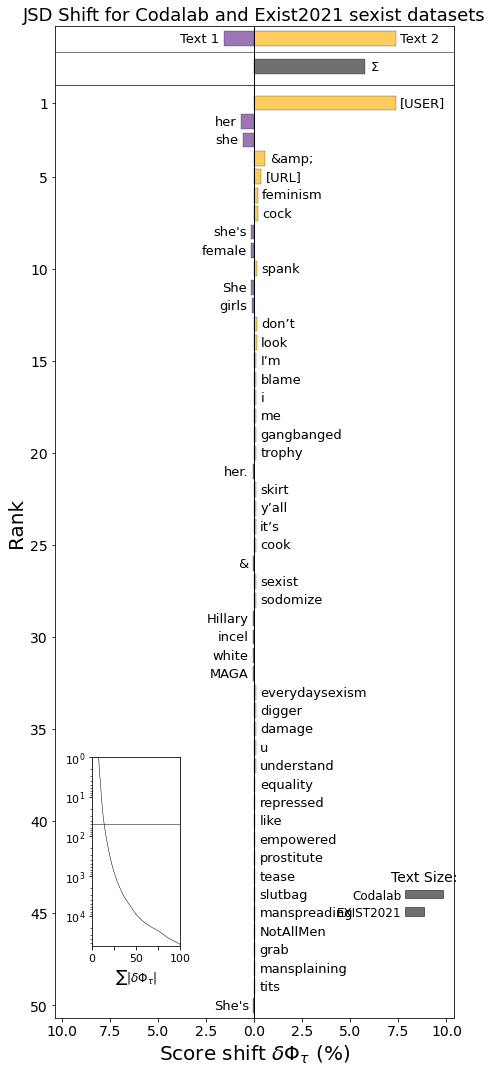

0.17468621836150808

In [101]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=d1_wordfreq,
                                 type2freq_2=d2_wordfreq,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['Codalab', 'EXIST2021'],
                          title='JSD Shift for Codalab and Exist2021 sexist datasets')
jsd_shift.diff